**Importing required library** 

In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

**Reading CSV files and making pandas dataframe**

In [7]:
df_class = pd.read_csv("/kaggle/input/electrical-fault-detection-and-classification/classData.csv")
df_class.sample(5).style.set_properties(**{'background-color': 'light blue',
                           'color': 'black',
                           'border-color': 'darkblack'})                                          

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
148,1,0,0,1,168.427228,56.028804,-48.948997,-0.382174,0.521933,-0.139759
1128,1,0,0,1,117.776242,-40.144526,49.684201,0.366859,-0.591493,0.224634
4979,1,1,1,1,836.981018,-664.013599,-172.969682,0.006560,-0.039483,0.032923
1763,1,0,1,1,870.445689,-487.059186,10.944677,0.017994,-0.283639,0.265645
6809,0,0,0,0,51.239035,-15.173117,-39.238221,0.309247,0.302537,-0.611784


In [ ]:
df_class['Fault_Type'] = df_class['G'].astype('str') + df_class['C'].astype('str') + df_class['B'].astype('str') + df_class['A'].astype('str')
df_class.head(10).style.set_properties(**{'background-color': 'blue',
                           'color': 'white',
                           'border-color': 'darkblack'})


Type wise 

**fault type according to data description**

In [11]:
df_class['Fault_Type'][df_class['Fault_Type'] == '0000' ] = 'NO Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
df_class['Fault_Type'][df_class['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

**Data size(rows, cols)**

In [12]:
df_class.shape

(7861, 11)

**General description and  statistical properties of data**

In [13]:
df_class.describe().style.background_gradient(cmap='rainbow')

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


**Type wise fault count**

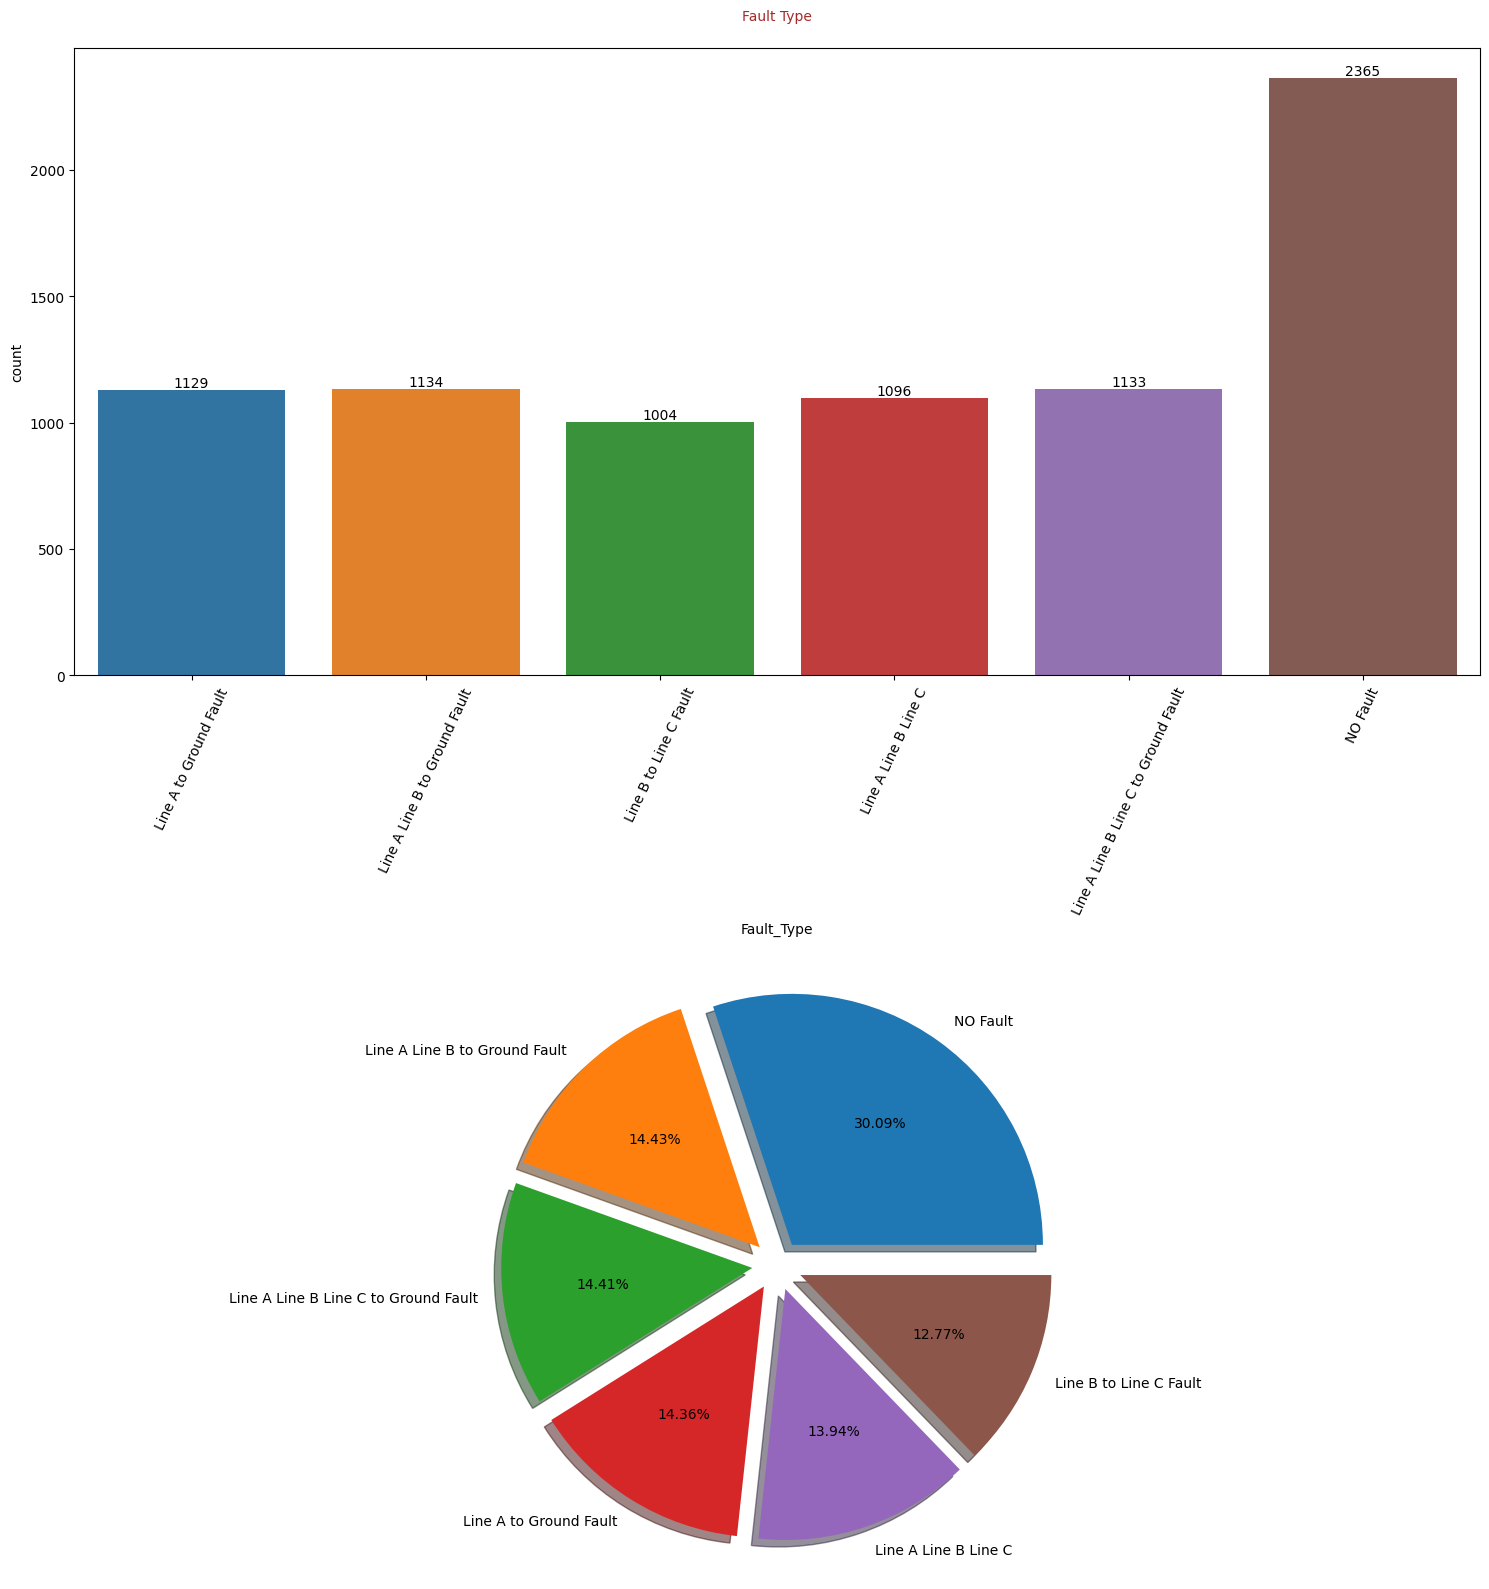

In [14]:
ax = plt.figure(figsize = (15,16))
ax = plt.subplot(2,1,1)
ax = sns.countplot(x='Fault_Type', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Fault Type", fontsize=20,color = 'Brown',font='Lucida Calligraphy',pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

ax =plt.subplot(2,1,2)
ax=df_class['Fault_Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
plt.tight_layout()
plt.axis('off');

**Current variation graph**

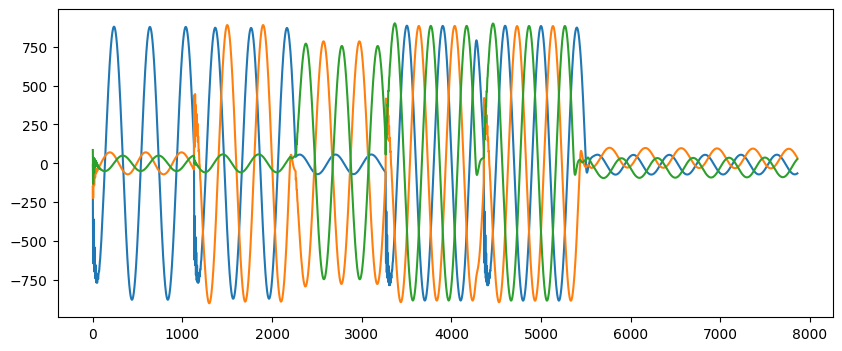

In [21]:
plt.figure(figsize = (10,4))
plt.plot(df_class["Ia"])
plt.plot(df_class["Ib"])
plt.plot(df_class["Ic"]);

**Voltage variation graph**

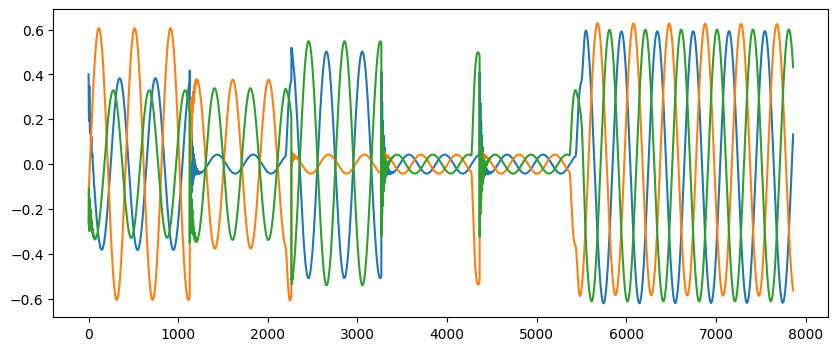

In [22]:
plt.figure(figsize = (10,4))
plt.plot(df_class["Va"])
plt.plot(df_class["Vb"])
plt.plot(df_class["Vc"]);

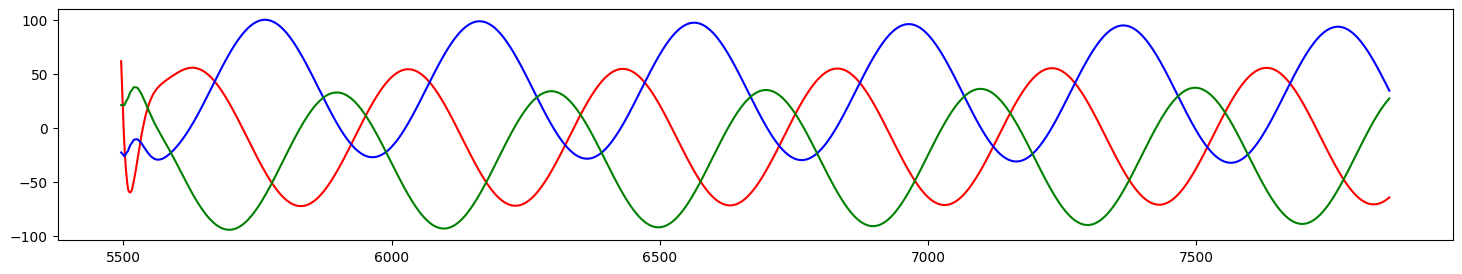

In [18]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Ia"],'r')
ax = plt.plot(No_Fault["Ib"],'b')
ax = plt.plot(No_Fault["Ic"],'g');

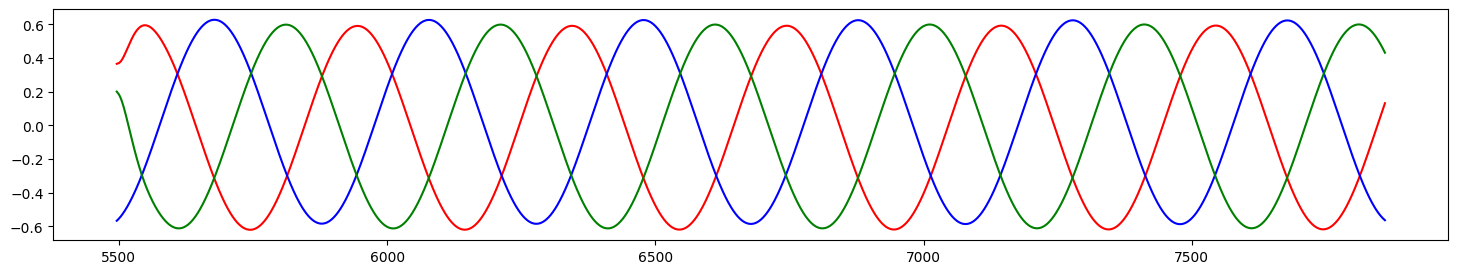

In [19]:
ax = plt.figure(figsize = (18,3))
ax = plt.plot(No_Fault["Va"],'r')
ax = plt.plot(No_Fault["Vb"],'b')
ax = plt.plot(No_Fault["Vc"],'g');

**Droping unimportant columns**

In [29]:
X = df_class.drop(['Fault_Type'],axis=1)
y = df_class['Fault_Type']

**Splitting data into training and testing sets**

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)

**Training model using logistic regresstion, fining confusion matrix, F-1 score, recall and precision**

Training Accuracy    : 90.2 %
Model Accuracy Score : 89.57 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.56      1.00      0.72       213
           1       1.00      1.00      1.00       231
           2       1.00      1.00      1.00       248
           3       1.00      1.00      1.00       227
           4       1.00      0.17      0.29       198
           5       1.00      1.00      1.00       456

    accuracy                           0.90      1573
   macro avg       0.93      0.86      0.84      1573
weighted avg       0.94      0.90      0.87      1573

--------------------------------------------------------


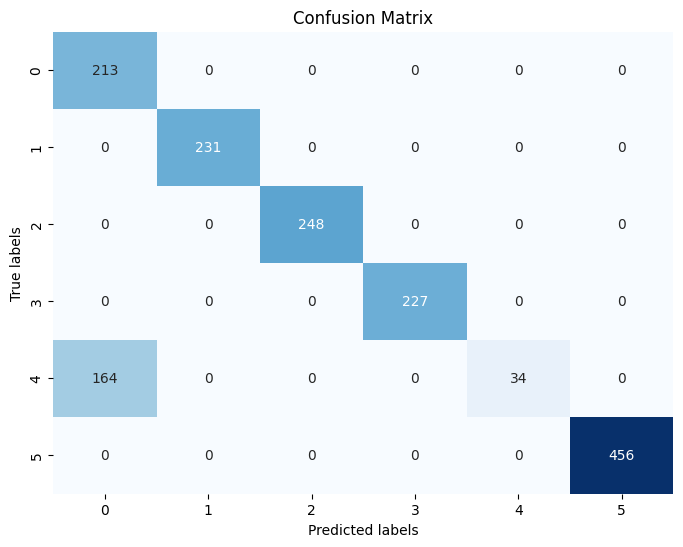

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_lr = logreg.predict(X_test)

# Calculate training accuracy
log_train = round(logreg.score(X_train, y_train) * 100, 2)

# Calculate model accuracy score
log_accuracy = round(accuracy_score(y_test, y_pred_lr) * 100, 2)

print("Training Accuracy    :", log_train, "%")
print("Model Accuracy Score :", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_lr))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


**Training model using SVM, fining confusion matrix, F-1 score, recall and precision**


Training Accuracy    : 100.0 %
Model Accuracy Score : 79.53 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       213
           1       0.39      0.70      0.50       231
           2       1.00      0.62      0.77       248
           3       1.00      0.79      0.88       227
           4       1.00      0.84      0.91       198
           5       1.00      1.00      1.00       456

    accuracy                           0.80      1573
   macro avg       0.84      0.76      0.78      1573
weighted avg       0.86      0.80      0.81      1573

--------------------------------------------------------


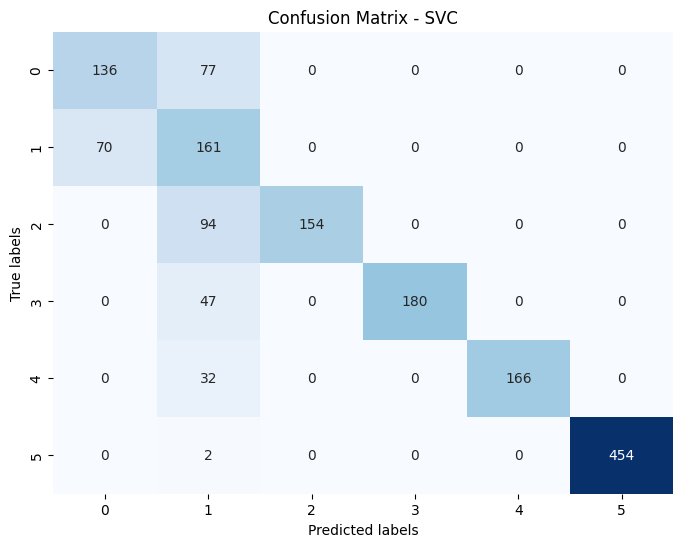

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Train SVM model
svc = SVC(kernel='rbf', C=10, gamma=0.1)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

# Calculate training accuracy
svc_train = round(svc.score(X_train, y_train) * 100, 2)

# Calculate model accuracy score
svc_accuracy = round(accuracy_score(y_test, y_pred_svc) * 100, 2)

print("Training Accuracy    :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

# Calculate confusion matrix
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - SVC')
plt.show()


**Prediction values using SVM**

In [33]:
prediction4 = svc.predict(X_test)
print(prediction4)

[0 0 1 ... 0 0 5]


**Sample output  actual vs predicted values**

In [34]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction4})
cross_checking.sample(10).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

,Actual,Predicted
7300,5,5
6898,5,5
6561,5,5
4442,1,0
4252,0,0
1566,2,2
1311,2,1
4270,0,0
4216,0,0
1209,2,1
